In [22]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('ticks')

In [51]:
all_f = '../data/processed/scrape/4-4/all-agg.csv'
#all_f = '../data/processed/scrape/4-4/test.tar.bzip2'

day_f = '../data/processed/scrape/4-4/day-agg.csv'
lang_f = '../data/processed/scrape/4-4/day-lang-agg.csv'


agg_df_day = pd.read_csv(day_f)
agg_df_lang = pd.read_csv(lang_f)
#                     parse_dates=['day'], infer_datetime_format=True)

In [3]:
# day by day
grouped_day = all_df[['day', 'count']].groupby(['day']).agg('sum')
grouped_day.to_csv(day_f)

In [4]:
# Language by language
grouped_lang = all_df[['day', 'language', 'count']].groupby(['day', 'language']).agg('sum')
grouped_lang.to_csv(lang_f)

#### User Aggreation

All together, the `.csv` file is 1.1 GB. We're going to break it into more manageable chunks. 

In [18]:
def get_year(date):
    return date[:4]

def get_month(date):
    return date.split('-')[1]

# assign year
all_df['year'] = all_df['day'].apply(lambda x: get_year(x))
all_df['month'] = all_df['day'].apply(lambda x: get_month(x))

In [23]:
# filter
df_17 = all_df[all_df.year == '2017']
df_17.head(2)

,day,language,user,count,year,month
0,2017-02-25,ar,0000_khalaf,11,2017,02
1,2017-02-25,ar,0001yasir,9,2017,02


In [25]:
jan = df_17[df_17.month == '01']
feb = df_17[df_17.month == '02']

In [28]:
out_f = '../data/processed/scrape/4-4/jan-agg.csv'
jan[['day', 'language', 'user', 'count']].to_csv(out_f, index=False)

In [29]:
out_f = '../data/processed/scrape/4-4/feb-agg.csv'
feb[['day', 'language', 'user', 'count']].to_csv(out_f, index=False)

In [31]:
mar = df_17[df_17.month == '03']

out_f = '../data/processed/scrape/4-4/mar-agg.csv'
mar[['day', 'language', 'user', 'count']].to_csv(out_f, index=False)

End the sampling.

----

Explore the gps numbers.

In [10]:
gps_dir = '../data/processed/scrape/4-5/'
gps_df_lang = pd.read_csv((gps_dir + 'all-gps.csv'), 
                         parse_dates=['day'],
                         infer_datetime_format=True)
gps_df_day = pd.read_csv((gps_dir + 'day-gps.csv'), 
                         parse_dates=['day'],
                         infer_datetime_format=True)

In [11]:
gps_df_day.head()

,day,gps,wo_gps
0,2016-12-22,1170,26100
1,2016-12-23,1294468,1488774
2,2016-12-24,1398356,1398356
3,2016-12-25,929201,929201
4,2016-12-26,213220,224566


/home/rlrson/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


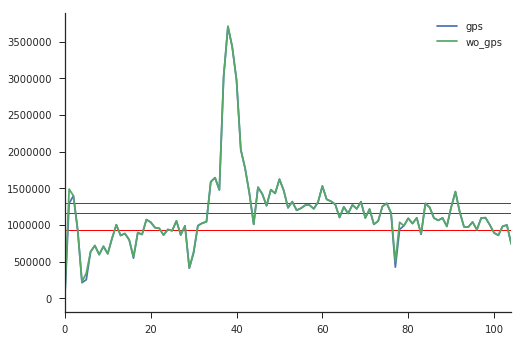

In [48]:
# set the size
plt.figure(figsize=(5, 2))

# Plot the data
gps_df_day[['gps', 'wo_gps']].plot(kind='line', sharey=True)

# Draw the IQR lines
# 25
plt.axhline(gps_df_day.gps.quantile(0.25), linewidth=1, color='r', zorder=0)
# 50
plt.axhline(gps_df_day.gps.mean(), linewidth=1, color='r', zorder=0)
# 75
plt.axhline(gps_df_day.gps.quantile(0.75), linewidth=1, color='r', zorder=0)

sns.despine()

/home/rlrson/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


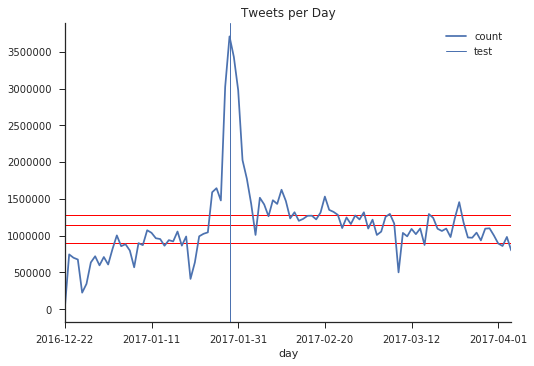

In [83]:
# set the size
plt.figure(figsize=(5, 2))

# Plot the data
agg_df_day.plot(kind='line',
               x='day',
               y='count',
               title='Tweets per Day')

# Draw the IQR lines
# 25
plt.axhline(agg_df_day['count'].quantile(0.25), linewidth=1, color='r', zorder=0)
# 50
plt.axhline(agg_df_day['count'].mean(), linewidth=1, color='r', zorder=0)
# 75
plt.axhline(agg_df_day['count'].quantile(0.75), linewidth=1, color='r', zorder=0)

#add event line
plt.axvline(pd.to_datetime('2017-01-29').day + 9, 
            linewidth=1, 
            zorder=0
           label='test')
# add event annotation


sns.despine()

In [79]:
pd.to_datetime('2017-01-29').day

29

In [54]:
agg_df_lang['language'].unique().tolist()

['ar',
 'ca',
 'cs',
 'de',
 'el',
 'en',
 'en-AU',
 'en-GB',
 'en-gb',
 'es',
 'eu',
 'fa',
 'fi',
 'fr',
 'gl',
 'hr',
 'hu',
 'id',
 'it',
 'ja',
 'ko',
 'msa',
 'nb',
 'nl',
 'no',
 'pl',
 'pt',
 'ru',
 'sv',
 'th',
 'tr',
 'zh-CN',
 'zh-cn',
 'bg',
 'bn',
 'da',
 'en-IN',
 'en-US',
 'es-MX',
 'fil',
 'fr-CA',
 'ga',
 'he',
 'hi',
 'in',
 'kn',
 'lv',
 'mr',
 'ms',
 'pt-PT',
 'ro',
 'sk',
 'sr',
 'ta',
 'uk',
 'ur',
 'vi',
 'xx-lc',
 'zh-TW',
 'zh-tw',
 'lt',
 'zh-Hans',
 'gu',
 'pt-BR',
 'sl',
 'sq',
 'af',
 'so',
 'cy',
 'en-SS',
 'ml',
 'zh-HK',
 'zh-Hant',
 'nl-BE',
 'ht',
 'lolc',
 'TR',
 'zh',
 'pa-Arab',
 'ld',
 'mn',
 'mk',
 'et',
 'ig',
 'en-CA',
 'be',
 'az',
 'bs',
 'ku',
 'is',
 'ckb',
 'pa',
 'co',
 'haw']

/home/rlrson/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


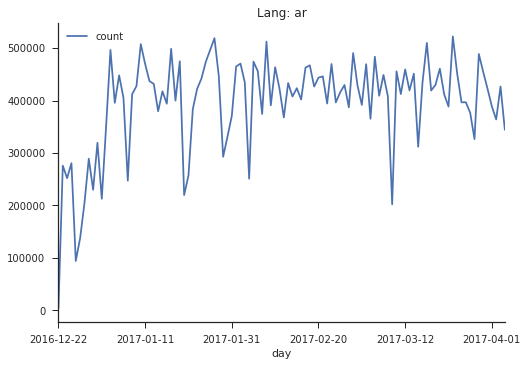

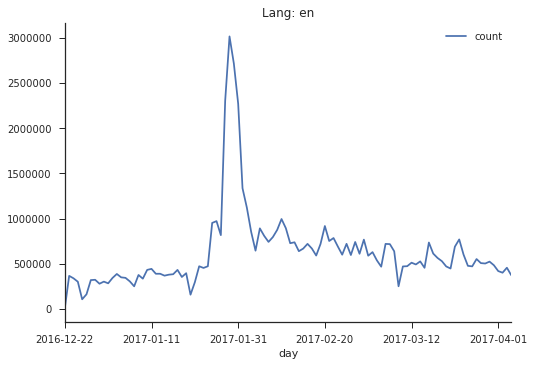

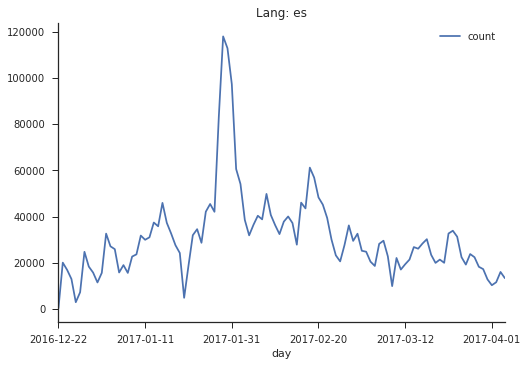

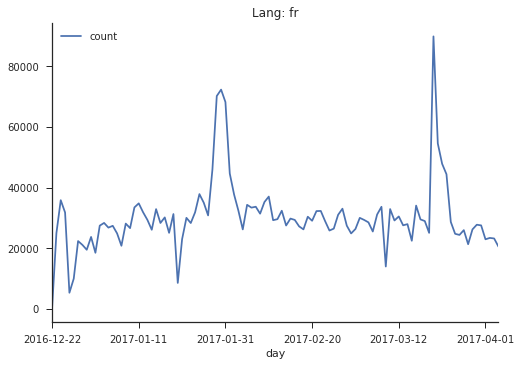

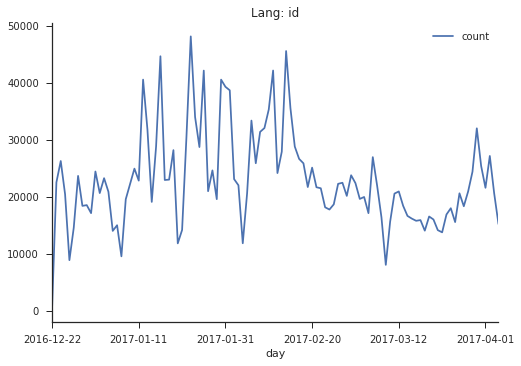

In [71]:
langs = ['ar', 'en', 'es', 'fr', 'id']
plt.figure()

for lang in langs:
    lang_df = agg_df_lang[agg_df_lang.language == lang]
    lang_df.plot(kind='line',
               x='day',
               y='count',
                title="Lang: {}".format(lang))
    
    sns.despine()